In [1]:
import numpy as np

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
def split_area(point1 = 0, point2 = 2, N = 10):
    delta = (point2 - point1) / (N)
    points = [(point1 + (delta*i)) for i in range(N + 1)]
    return points

In [26]:
def f(x, y):
    return 2 * x * y

def y(x):
    return np.exp(x**2 - 3)

a = 0
b = 2
y_0 = 1 / np.exp(3)
N = 50

In [27]:
x = split_area(a, b, N=N)

In [28]:
y_num = []
x_delta = x[1] - x[0]
y_num.append(y_0)
for i in range(N):
    y_num.append(y_num[i] + x_delta*f(x[i],y_num[i]))

In [29]:
delta = []
for i in range(N):
    delta_i = np.abs(y_num[i] - y(x[i]))
    delta.append(delta_i)

In [30]:
print("|  x_i | yn_i |  y_i |  d_i |")
print("|---------------------------|")
for n, x_i, yn_i, y_i, delta_i in zip(list(range(N)), x, y_num, [y(x_) for x_ in x], delta):
    print(f"|{x_i:6.3f}|{yn_i:6.3f}|{y_i:6.3f}|{delta_i:6.4f}|")

|  x_i | yn_i |  y_i |  d_i |
|---------------------------|
| 0.000| 0.050| 0.050|0.0000|
| 0.040| 0.050| 0.050|0.0001|
| 0.080| 0.050| 0.050|0.0002|
| 0.120| 0.050| 0.051|0.0002|
| 0.160| 0.051| 0.051|0.0003|
| 0.200| 0.051| 0.052|0.0004|
| 0.240| 0.052| 0.053|0.0005|
| 0.280| 0.053| 0.054|0.0006|
| 0.320| 0.054| 0.055|0.0007|
| 0.360| 0.056| 0.057|0.0009|
| 0.400| 0.057| 0.058|0.0010|
| 0.440| 0.059| 0.060|0.0012|
| 0.480| 0.061| 0.063|0.0013|
| 0.520| 0.064| 0.065|0.0016|
| 0.560| 0.066| 0.068|0.0018|
| 0.600| 0.069| 0.071|0.0020|
| 0.640| 0.073| 0.075|0.0023|
| 0.680| 0.076| 0.079|0.0027|
| 0.720| 0.081| 0.084|0.0031|
| 0.760| 0.085| 0.089|0.0036|
| 0.800| 0.090| 0.094|0.0041|
| 0.840| 0.096| 0.101|0.0047|
| 0.880| 0.103| 0.108|0.0054|
| 0.920| 0.110| 0.116|0.0063|
| 0.960| 0.118| 0.125|0.0073|
| 1.000| 0.127| 0.135|0.0084|
| 1.040| 0.137| 0.147|0.0098|
| 1.080| 0.148| 0.160|0.0114|
| 1.120| 0.161| 0.175|0.0132|
| 1.160| 0.176| 0.191|0.0154|
| 1.200| 0.192| 0.210|0.0181|
| 1.240| 0

## Определить значение N* для ошибки < 10^-2

In [11]:
def compute_error_wrt_N(N=10):
    x = split_area(a, b, N=N)
    y_num = []
    y_num.append(y_0)
    x_delt = x[1] - x[0]
    for i in range(N):
        y_num.append(y_num[i] + x_delt*f(x[i],y_num[i]))
        
    delta = []
    for i, x_i in enumerate(x):
        delta_i = np.abs(y_num[i] - y(x_i))
        delta.append(delta_i)
        
    return np.max(delta[1:])

In [32]:
errors = []
for N_i in tqdm(np.linspace(start=1, stop=9000, num=9000)):
    error = compute_error_wrt_N(int(N_i))
    errors.append(error)
    if error < 0.01:
        print(f"N* = {int(N_i)}")
        print(f"Error = {error}")
        break

N* = 3976
Error = 0.00999868722584818


In [34]:
import matplotlib.pyplot as plt

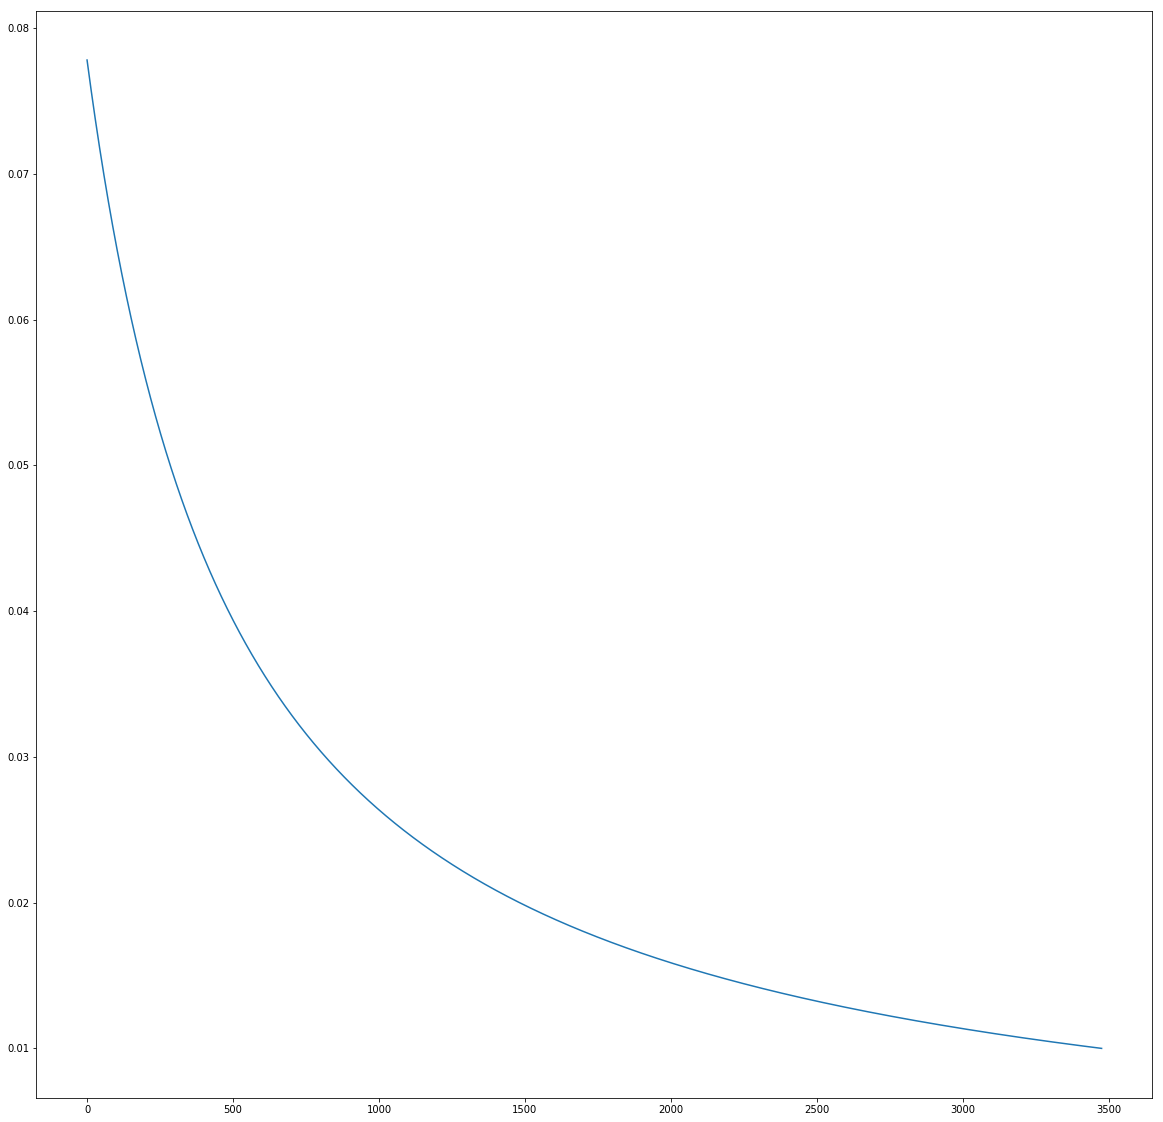

In [37]:
plt.figure(figsize=(20, 20))
plt.plot(errors[500:])